In [ ]:
!pip install arch


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import arch
from arch import arch_model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 9.3 MB/s eta 0:00:00


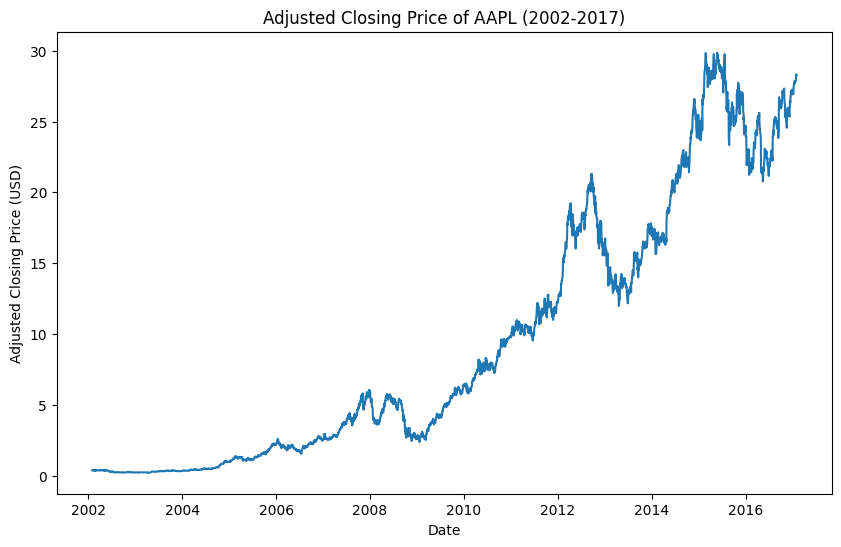

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/content/AAPL.csv"
data = pd.read_csv(file_path)


data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract Adjusted Closing prices
data_AC = data['Adj Close']

# Plot Adjusted Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data_AC)
plt.title('Adjusted Closing Price of AAPL (2002-2017)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.show()


In [ ]:
import pandas as pd



# Calculate minimum
min_value = data_AC.min()
print("Minimum:", min_value)

# Calculate maximum
max_value = data_AC.max()
print("Maximum:", max_value)

# Calculate mean
mean_value = data_AC.mean()
print("Mean:", mean_value)


Minimum: 0.198346
Maximum: 29.863834
Mean: 9.45998066357616


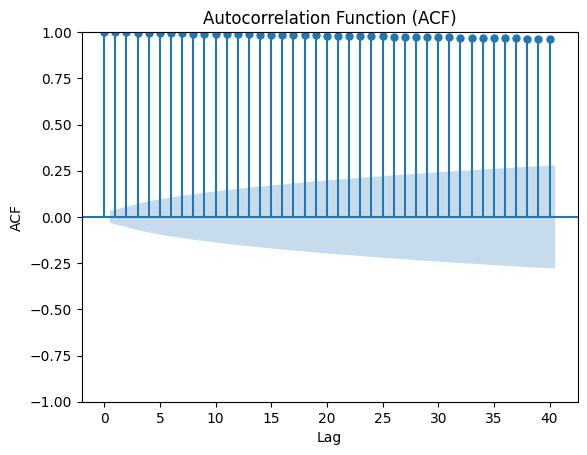

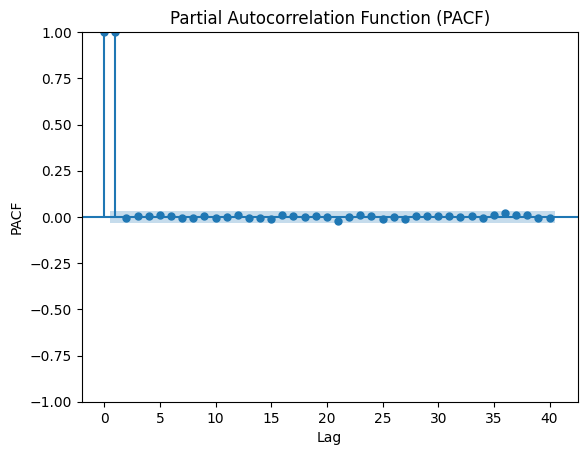

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Plot ACF
plot_acf(data_AC, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plot_pacf(data_AC, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller



# Perform Augmented Dickey-Fuller test
result = adfuller(data_AC)
adf_statistic = result[0]
p_value = result[1]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)


ADF Statistic: 0.3142401652361502
p-value: 0.9779884661475815


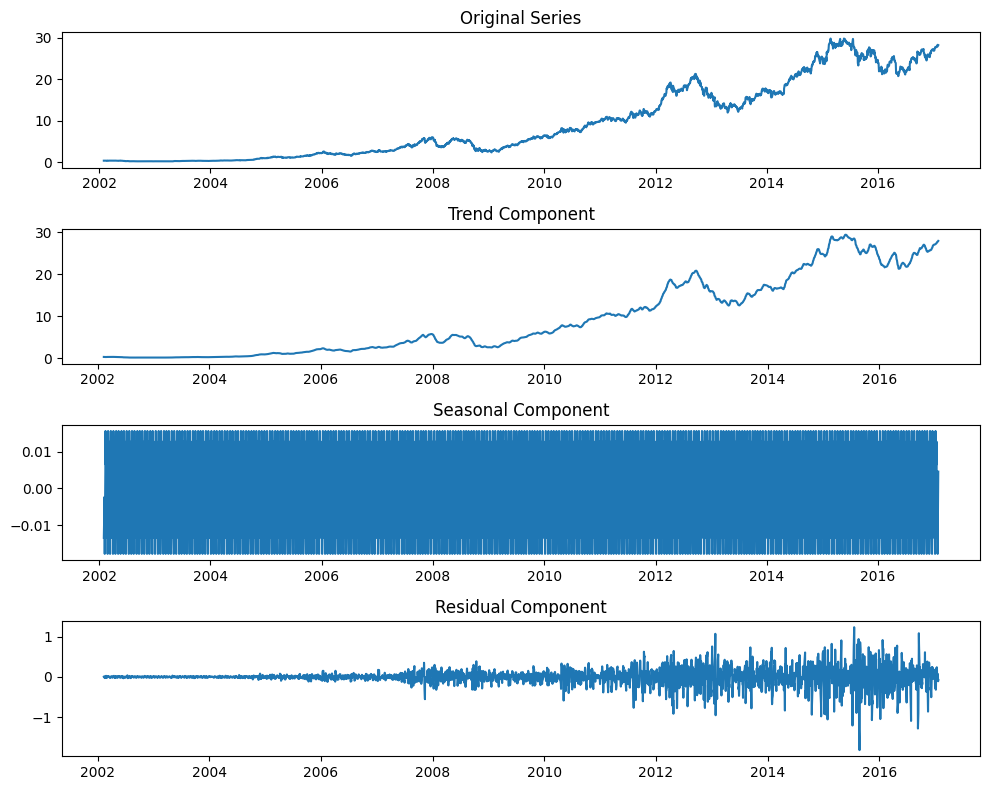

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Perform seasonal decomposition
result = seasonal_decompose(data_AC, model='additive', period=12)

# Plot decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Original Series')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')
plt.tight_layout()
plt.show()


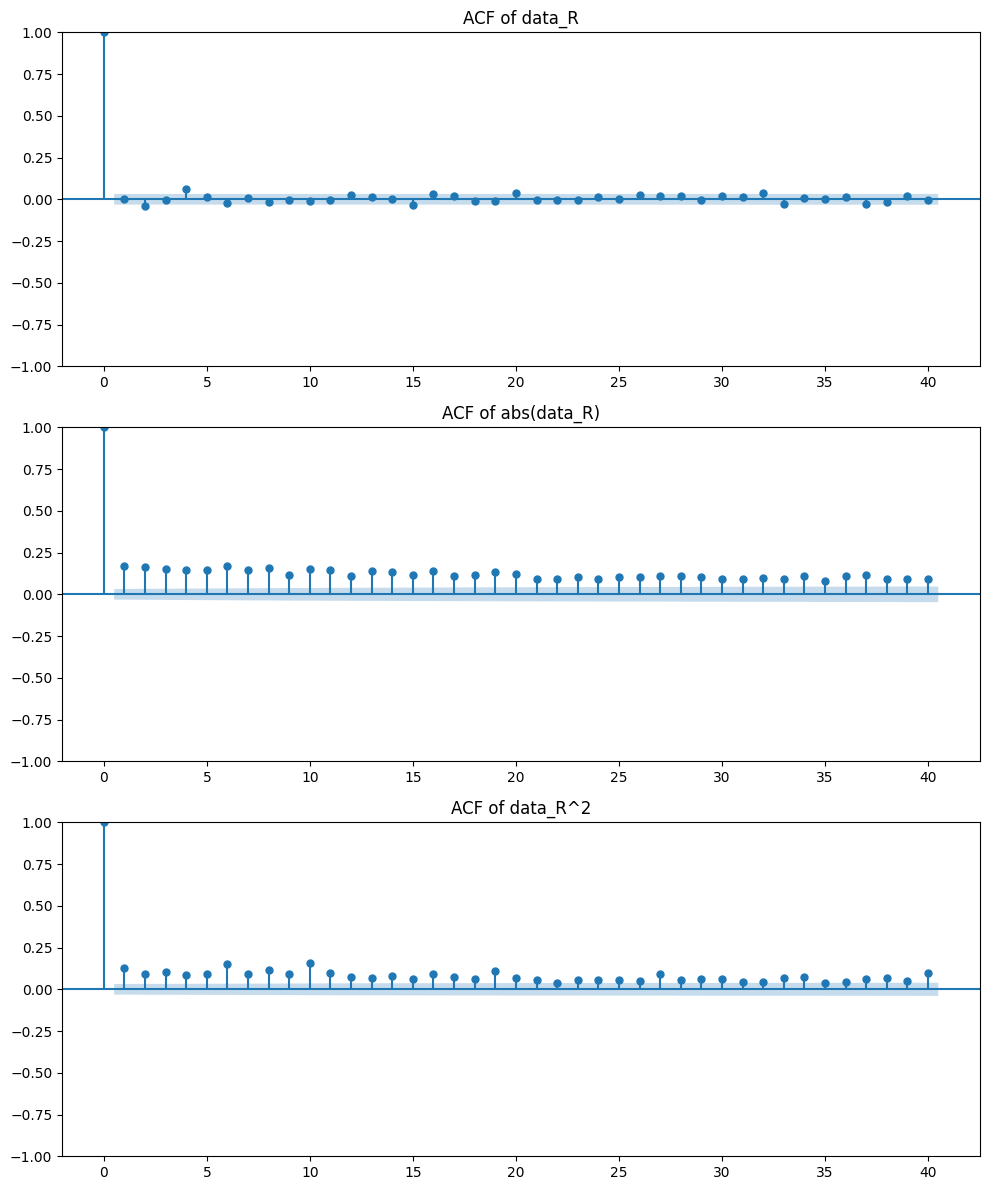

ADF Statistic: -29.635425644470427
p-value: 0.0


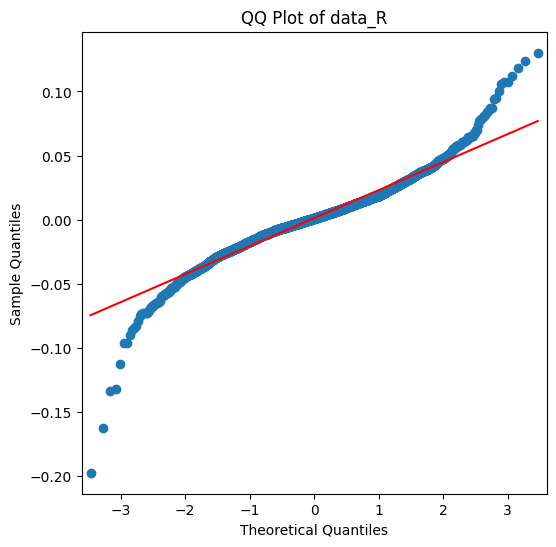

Skewness: -0.1925022038420399
Kurtosis: 5.44376440787936
EACF of data_R:
[[        nan         nan         nan ...         nan         nan
          nan]
 [ 0.00417943         nan         nan ...         nan         nan
          nan]
 [ 0.00417943 -0.03977427         nan ...         nan         nan
          nan]
 ...
 [ 0.00417943 -0.03977427 -0.00671995 ...         nan         nan
          nan]
 [ 0.00417943 -0.03977427 -0.00671995 ... -0.01351524         nan
          nan]
 [ 0.00417943 -0.03977427 -0.00671995 ... -0.01351524  0.0201847
          nan]]
EACF of abs(data_R):
[[       nan        nan        nan ...        nan        nan        nan]
 [0.17251068        nan        nan ...        nan        nan        nan]
 [0.17251068 0.16410699        nan ...        nan        nan        nan]
 ...
 [0.17251068 0.16410699 0.15362873 ...        nan        nan        nan]
 [0.17251068 0.16410699 0.15362873 ... 0.0912873         nan        nan]
 [0.17251068 0.16410699 0.15362873 ... 0.0912

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import skew, kurtosis

# Data transformation
_lambda = 0  # lambda is a reserved keyword, so using _lambda instead
percentage = 1
data_R = np.diff(np.log(data_AC)) * percentage
data_R = data_R[~np.isnan(data_R)]

# ACF/PACF
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

plot_acf(data_R, lags=40, ax=axes[0])
axes[0].set_title('ACF of data_R')

plot_acf(np.abs(data_R), lags=40, ax=axes[1])
axes[1].set_title('ACF of abs(data_R)')

plot_acf(data_R ** 2, lags=40, ax=axes[2])
axes[2].set_title('ACF of data_R^2')

plt.tight_layout()
plt.show()

# ADF test
result = adfuller(data_R)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# QQ Plot
fig, ax = plt.subplots(figsize=(6, 6))
qqplot(data_R, line='r', ax=ax)
plt.title('QQ Plot of data_R')
plt.show()

# Skewness and kurtosis
print("Skewness:", skew(data_R))
print("Kurtosis:", kurtosis(data_R))

import numpy as np
from statsmodels.tsa.stattools import acf

def eacf(data, max_lags=40):
    eacf_matrix = np.zeros((max_lags, max_lags))
    acf_values = acf(data, nlags=max_lags, fft=False)
    for i in range(max_lags):
        for j in range(max_lags):
            if i > j:
                eacf_matrix[i, j] = acf_values[j+1]
            else:
                eacf_matrix[i, j] = np.nan
    return eacf_matrix

print("EACF of data_R:")
print(eacf(data_R))
print("EACF of abs(data_R):")
print(eacf(np.abs(data_R)))
print("EACF of data_R^2:")
print(eacf(data_R ** 2))




In [ ]:

train_num = len(data_R) - 30
data_train = data_R[:train_num]
data_test = data_R[train_num:]



print("Length of training set:", len(data_train))
print("Length of testing set:", len(data_test))


Length of training set: 3744
Length of testing set: 30


In [ ]:
!pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 5.8 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

# Fit GARCH(1,1) model
garch_model = arch_model(data_R, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()

# Display model summary
print(garch_result.summary())

# Compute AIC
aic = garch_result.aic
print("AIC:", aic)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2247600451.6158404
Iteration:      2,   Func. Count:     18,   Neg. LLF: -9287.224227136925
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9287.224241001994
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9287.22
Distribution:                  Normal   AIC:                          -18566.4
Method:            Maximum Likelihood   BIC:                          -18541.5
                                        No. Observations:                 3774
Date:                Thu, May 02 2024   Df Residuals:                     3773
Time:         

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


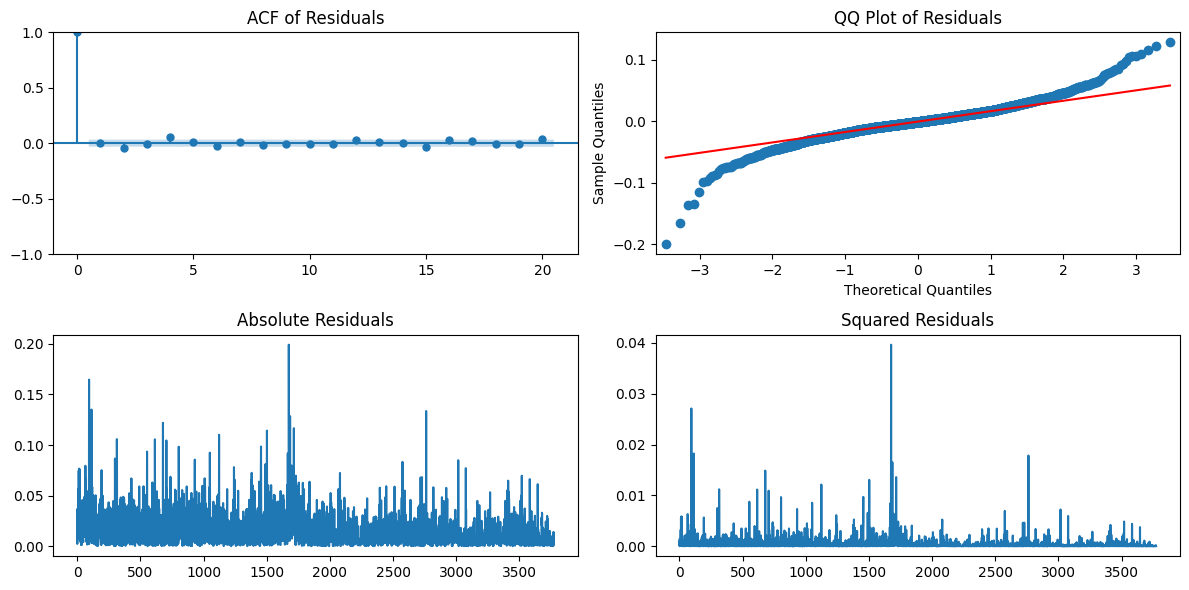

Box-Ljung test results:
       lb_stat      lb_pvalue
20  766.269618  2.029382e-149


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Residuals from the GARCH model
residuals = garch_result.resid

# Check residuals
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(221)
plot_acf(residuals, ax=ax1, lags=20, alpha=0.05)
ax1.set_title('ACF of Residuals')

ax2 = fig.add_subplot(222)
qqplot(residuals, line='q', ax=ax2)
ax2.set_title('QQ Plot of Residuals')

ax3 = fig.add_subplot(223)
ax3.plot(np.abs(residuals))
ax3.set_title('Absolute Residuals')

ax4 = fig.add_subplot(224)
ax4.plot(residuals ** 2)
ax4.set_title('Squared Residuals')

plt.tight_layout()
plt.show()

# Perform Box-Ljung test on squared residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals**2, lags=[20], return_df=True)
print("Box-Ljung test results:")
print(lb_test)


In [ ]:
from arch import arch_model

# Define sGARCH(1,1) specification with normal distribution
sgarch_spec = arch_model(data_R, vol='Garch', p=1, q=1, dist='normal')

# Fit the sGARCH(1,1) model
sgarch_result = sgarch_spec.fit()

# Display model summary
print(sgarch_result.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2247600451.6158404
Iteration:      2,   Func. Count:     18,   Neg. LLF: -9287.224227136925
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9287.224241001994
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9287.22
Distribution:                  Normal   AIC:                          -18566.4
Method:            Maximum Likelihood   BIC:                          -18541.5
                                        No. Observations:                 3774
Date:                Thu, May 02 2024   Df Residuals:                     3773
Time:         

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
from arch import arch_model

# Define sGARCH(1,1) specification with Skew Normal distribution
sgarch_spec = arch_model(data_R, vol='Garch', p=1, q=1, dist='skewt')

# Fit the sGARCH(1,1) model with Skew Normal distribution
sgarch_result = sgarch_spec.fit()

# Display model summary
print(sgarch_result.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 124670.7620070447
Iteration:      2,   Func. Count:     25,   Neg. LLF: 12967004.026187334
Iteration:      3,   Func. Count:     42,   Neg. LLF: 19462.32522927119
Iteration:      4,   Func. Count:     52,   Neg. LLF: 234658.75207722548
Iteration:      5,   Func. Count:     60,   Neg. LLF: 100897.58607413672
Iteration:      6,   Func. Count:     68,   Neg. LLF: 10694.636508844895
Iteration:      7,   Func. Count:     75,   Neg. LLF: 37673.45577635095
Iteration:      8,   Func. Count:     85,   Neg. LLF: 93399.81319974919
Iteration:      9,   Func. Count:    101,   Neg. LLF: 132429.29747016903
Iteration:     10,   Func. Count:    111,   Neg. LLF: 11870.957590898584
Iteration:     11,   Func. Count:    122,   Neg. LLF: 63175.05974371591
Iteration:     12,   Func. Count:    137,   Neg. LLF: 92887.48568154198
Iteration:     13,   Func. Count:    149,   Neg. LLF: 38530.701676369295
Iteration:     14,   Func. Count:    162,   Neg. LLF: 378

In [ ]:
from arch import arch_model

# Define the sGARCH(1,1) specification with Skew t-distribution (Skew Normal)
sgarch_spec = arch_model(data_R, vol='Garch', p=1, q=1, dist='skewt')

# Fit the sGARCH(1,1) model with Skew t-distribution
sgarch_result = sgarch_spec.fit()

# Display model summary
print(sgarch_result.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 124670.7620070447
Iteration:      2,   Func. Count:     25,   Neg. LLF: 12967004.026187334
Iteration:      3,   Func. Count:     42,   Neg. LLF: 19462.32522927119
Iteration:      4,   Func. Count:     52,   Neg. LLF: 234658.75207722548
Iteration:      5,   Func. Count:     60,   Neg. LLF: 100897.58607413672
Iteration:      6,   Func. Count:     68,   Neg. LLF: 10694.636508844895
Iteration:      7,   Func. Count:     75,   Neg. LLF: 37673.45577635095
Iteration:      8,   Func. Count:     85,   Neg. LLF: 93399.81319974919
Iteration:      9,   Func. Count:    101,   Neg. LLF: 132429.29747016903
Iteration:     10,   Func. Count:    111,   Neg. LLF: 11870.957590898584
Iteration:     11,   Func. Count:    122,   Neg. LLF: 63175.05974371591
Iteration:     12,   Func. Count:    137,   Neg. LLF: 92887.48568154198
Iteration:     13,   Func. Count:    149,   Neg. LLF: 38530.701676369295
Iteration:     14,   Func. Count:    162,   Neg. LLF: 378

In [ ]:
from arch import arch_model

# Define the sGARCH(1,1) specification with Skew Student's t-distribution
sgarch_spec = arch_model(data_R, vol='Garch', p=1, q=1, dist='skewstudent')

# Fit the sGARCH(1,1) model with Skew Student's t-distribution
sgarch_result = sgarch_spec.fit()

# Display model summary
print(sgarch_result.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 124670.7620070447
Iteration:      2,   Func. Count:     25,   Neg. LLF: 12967004.026187334
Iteration:      3,   Func. Count:     42,   Neg. LLF: 19462.32522927119
Iteration:      4,   Func. Count:     52,   Neg. LLF: 234658.75207722548
Iteration:      5,   Func. Count:     60,   Neg. LLF: 100897.58607413672
Iteration:      6,   Func. Count:     68,   Neg. LLF: 10694.636508844895
Iteration:      7,   Func. Count:     75,   Neg. LLF: 37673.45577635095
Iteration:      8,   Func. Count:     85,   Neg. LLF: 93399.81319974919
Iteration:      9,   Func. Count:    101,   Neg. LLF: 132429.29747016903
Iteration:     10,   Func. Count:    111,   Neg. LLF: 11870.957590898584
Iteration:     11,   Func. Count:    122,   Neg. LLF: 63175.05974371591
Iteration:     12,   Func. Count:    137,   Neg. LLF: 92887.48568154198
Iteration:     13,   Func. Count:    149,   Neg. LLF: 38530.701676369295
Iteration:     14,   Func. Count:    162,   Neg. LLF: 378

In [26]:
from arch import arch_model

# Define the sGARCH(1,1) specification with Generalized Error Distribution (GED)
sgarch_spec = arch_model(data_R, vol='Garch', p=1, q=1, dist='ged')

# Fit the sGARCH(1,1) model with Generalized Error Distribution (GED)
sgarch_result = sgarch_spec.fit()

# Display model summary
print(sgarch_result.summary())


Iteration:      1,   Func. Count:      7,   Neg. LLF: 1610876.0067323558
Iteration:      2,   Func. Count:     23,   Neg. LLF: 19858656806699.35
Iteration:      3,   Func. Count:     39,   Neg. LLF: 26885884.969157852
Iteration:      4,   Func. Count:     55,   Neg. LLF: inf
Iteration:      5,   Func. Count:     68,   Neg. LLF: 1016051.8310458858
Iteration:      6,   Func. Count:     79,   Neg. LLF: 1.5801053059247371e+62
Iteration:      7,   Func. Count:     94,   Neg. LLF: 10531.904039550109
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10531.904029626781
            Iterations: 11
            Function evaluations: 94
            Gradient evaluations: 7
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                                  y   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:         

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


In [27]:
from arch import arch_model

# Define the sGARCH(1,1) specification with Skew Generalized Error Distribution (sGED)
sgarch_spec = arch_model(data_R, vol='Garch', p=1, q=1, dist='skewstudent')

# Fit the sGARCH(1,1) model with Skew Generalized Error Distribution (sGED)
sgarch_result = sgarch_spec.fit()

# Display model summary
print(sgarch_result.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 124670.7620070447
Iteration:      2,   Func. Count:     25,   Neg. LLF: 12967004.026187334
Iteration:      3,   Func. Count:     42,   Neg. LLF: 19462.32522927119
Iteration:      4,   Func. Count:     52,   Neg. LLF: 234658.75207722548
Iteration:      5,   Func. Count:     60,   Neg. LLF: 100897.58607413672
Iteration:      6,   Func. Count:     68,   Neg. LLF: 10694.636508844895
Iteration:      7,   Func. Count:     75,   Neg. LLF: 37673.45577635095
Iteration:      8,   Func. Count:     85,   Neg. LLF: 93399.81319974919
Iteration:      9,   Func. Count:    101,   Neg. LLF: 132429.29747016903
Iteration:     10,   Func. Count:    111,   Neg. LLF: 11870.957590898584
Iteration:     11,   Func. Count:    122,   Neg. LLF: 63175.05974371591
Iteration:     12,   Func. Count:    137,   Neg. LLF: 92887.48568154198
Iteration:     13,   Func. Count:    149,   Neg. LLF: 38530.701676369295
Iteration:     14,   Func. Count:    162,   Neg. LLF: 378

In [28]:
from arch import arch_model

# Define the sGARCH(1,1) specification with Normal Inverse Gaussian (NIG) distribution
sgarch_spec = arch_model(data_R, vol='Garch', p=1, q=1, dist='normal')

# Fit the sGARCH(1,1) model with Normal Inverse Gaussian (NIG) distribution
sgarch_result = sgarch_spec.fit()

# Display model summary
print(sgarch_result.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2247600451.6158404
Iteration:      2,   Func. Count:     18,   Neg. LLF: -9287.224227136925
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9287.224241001994
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9287.22
Distribution:                  Normal   AIC:                          -18566.4
Method:            Maximum Likelihood   BIC:                          -18541.5
                                        No. Observations:                 3774
Date:                Thu, May 02 2024   Df Residuals:                     3773
Time:         

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [29]:
from arch import arch_model

# Define the sGARCH(1,1) specification with Generalized Hyperbolic (GH) distribution
sgarch_spec_gh = arch_model(data_R, vol='Garch', p=1, q=1, dist='ged')

# Fit the sGARCH(1,1) model with Generalized Hyperbolic (GH) distribution
sgarch_result_gh = sgarch_spec_gh.fit()

# Display model summary
print(sgarch_result_gh.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


Iteration:      1,   Func. Count:      7,   Neg. LLF: 1610876.0067323558
Iteration:      2,   Func. Count:     23,   Neg. LLF: 19858656806699.35
Iteration:      3,   Func. Count:     39,   Neg. LLF: 26885884.969157852
Iteration:      4,   Func. Count:     55,   Neg. LLF: inf
Iteration:      5,   Func. Count:     68,   Neg. LLF: 1016051.8310458858
Iteration:      6,   Func. Count:     79,   Neg. LLF: 1.5801053059247371e+62
Iteration:      7,   Func. Count:     94,   Neg. LLF: 10531.904039550109
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10531.904029626781
            Iterations: 11
            Function evaluations: 94
            Gradient evaluations: 7
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                                  y   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:         

In [30]:
from arch import arch_model

# Define the sGARCH(1,1) specification with Johnson's S_U distribution
sgarch_spec_jsu = arch_model(data_R, vol='Garch', p=1, q=1, dist='skewt')

# Fit the sGARCH(1,1) model with Johnson's S_U distribution
sgarch_result_jsu = sgarch_spec_jsu.fit()

# Display model summary
print(sgarch_result_jsu.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 124670.7620070447
Iteration:      2,   Func. Count:     25,   Neg. LLF: 12967004.026187334
Iteration:      3,   Func. Count:     42,   Neg. LLF: 19462.32522927119
Iteration:      4,   Func. Count:     52,   Neg. LLF: 234658.75207722548
Iteration:      5,   Func. Count:     60,   Neg. LLF: 100897.58607413672
Iteration:      6,   Func. Count:     68,   Neg. LLF: 10694.636508844895
Iteration:      7,   Func. Count:     75,   Neg. LLF: 37673.45577635095
Iteration:      8,   Func. Count:     85,   Neg. LLF: 93399.81319974919
Iteration:      9,   Func. Count:    101,   Neg. LLF: 132429.29747016903
Iteration:     10,   Func. Count:    111,   Neg. LLF: 11870.957590898584
Iteration:     11,   Func. Count:    122,   Neg. LLF: 63175.05974371591
Iteration:     12,   Func. Count:    137,   Neg. LLF: 92887.48568154198
Iteration:     13,   Func. Count:    149,   Neg. LLF: 38530.701676369295
Iteration:     14,   Func. Count:    162,   Neg. LLF: 378

In [35]:
from arch import arch_model

# Create the GARCH model with T-Distribution and provide the data when creating the model
fgarch_model_garch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, dist='t')

# Fit the model
fgarch_result_garch = fgarch_model_garch.fit()

# Display model summary
print(fgarch_result_garch.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: -9444.16402046385
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9444.164020563641
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                9444.16
Distribution:      Standardized Student's t   AIC:                          -18880.3
Method:                  Maximum Likelihood   BIC:                          -18855.4
                                              No. Observations:                 3774
Date:                      Thu, May 02 2024   Df Residuals:                     3774
Time:                              10:21:

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [36]:
from arch import arch_model

# Create the fGARCH(1,1) model with TGARCH sub-model and T-Distribution
fgarch_model_tgarch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, o=1, q=1, dist='t')

# Fit the model
fgarch_result_tgarch = fgarch_model_tgarch.fit()

# Display model summary
print(fgarch_result_tgarch.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: -9463.781845946167
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9463.78184598548
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
                        Zero Mean - GJR-GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                9463.78
Distribution:      Standardized Student's t   AIC:                          -18917.6
Method:                  Maximum Likelihood   BIC:                          -18886.4
                                              No. Observations:                 3774
Date:                      Thu, May 02 2024   Df Residuals:                     3774
Time:                              10:23:

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [37]:
from arch import arch_model

# Define the fGARCH(1,1) specification with AVGARCH sub-model and T-Distribution
fgarch_spec_avgarch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, power=2.0, dist='t')

# Fit the fGARCH(1,1) model with AVGARCH sub-model and T-Distribution
fgarch_result_avgarch = fgarch_spec_avgarch.fit()

# Display model summary
print(fgarch_result_avgarch.summary())

# Define the fGARCH(1,1) specification with NGARCH sub-model and T-Distribution
fgarch_spec_ngarch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, power=2.0, dist='t')

# Fit the fGARCH(1,1) model with NGARCH sub-model and T-Distribution
fgarch_result_ngarch = fgarch_spec_ngarch.fit()

# Display model summary
print(fgarch_result_ngarch.summary())

# Define the fGARCH(1,1) specification with NAGARCH sub-model and T-Distribution
fgarch_spec_nagarch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, power=2.0, dist='t')

# Fit the fGARCH(1,1) model with NAGARCH sub-model and T-Distribution
fgarch_result_nagarch = fgarch_spec_nagarch.fit()

# Display model summary
print(fgarch_result_nagarch.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarn

Iteration:      1,   Func. Count:      6,   Neg. LLF: -9463.781845946167
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9463.78184598548
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
                        Zero Mean - GJR-GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                9463.78
Distribution:      Standardized Student's t   AIC:                          -18917.6
Method:                  Maximum Likelihood   BIC:                          -18886.4
                                              No. Observations:                 3774
Date:                      Thu, May 02 2024   Df Residuals:                     3774
Time:                              10:25:

In [38]:
from arch import arch_model

# Define the fGARCH(1,1) specification with APARCH sub-model and T-Distribution
fgarch_spec_aparch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, power=2.0, dist='t')

# Fit the fGARCH(1,1) model with APARCH sub-model and T-Distribution
fgarch_result_aparch = fgarch_spec_aparch.fit()

# Display model summary
print(fgarch_result_aparch.summary())

# Define the fGARCH(1,1) specification with GJRGARCH sub-model and T-Distribution
fgarch_spec_gjrgarch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, power=2.0, dist='t')

# Fit the fGARCH(1,1) model with GJRGARCH sub-model and T-Distribution
fgarch_result_gjrgarch = fgarch_spec_gjrgarch.fit()

# Display model summary
print(fgarch_result_gjrgarch.summary())

# Define the fGARCH(1,1) specification with ALLGARCH sub-model and T-Distribution
fgarch_spec_allgarch = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, power=2.0, dist='t')

# Fit the fGARCH(1,1) model with ALLGARCH sub-model and T-Distribution
fgarch_result_allgarch = fgarch_spec_allgarch.fit()

# Display model summary
print(fgarch_result_allgarch.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: -9463.781845946167
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9463.78184598548
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
                        Zero Mean - GJR-GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                9463.78
Distribution:      Standardized Student's t   AIC:                          -18917.6
Method:                  Maximum Likelihood   BIC:                          -18886.4
                                              No. Observations:                 3774
Date:                      Thu, May 02 2024   Df Residuals:                     3774
Time:                              10:26:

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [39]:
from arch import arch_model

# Define the eGARCH(1,1) specification with T-Distribution
egarch_spec = arch_model(data_R, mean='Zero', vol='EGARCH', p=1, q=1, dist='t')

# Fit the eGARCH(1,1) model
egarch_result = egarch_spec.fit()

# Display model summary
print(egarch_result.summary())

# Define the gjrGARCH(1,1) specification with T-Distribution
gjrgarch_spec = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, dist='t')

# Fit the gjrGARCH(1,1) model
gjrgarch_result = gjrgarch_spec.fit()

# Display model summary
print(gjrgarch_result.summary())

# Define the apARCH(1,1) specification with T-Distribution
aparch_spec = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, o=1, dist='t')

# Fit the apARCH(1,1) model
aparch_result = aparch_spec.fit()

# Display model summary
print(aparch_result.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 34617.103692367215
Iteration:      2,   Func. Count:     17,   Neg. LLF: 56298.038498285925
Iteration:      3,   Func. Count:     26,   Neg. LLF: -9360.899538315787
Iteration:      4,   Func. Count:     32,   Neg. LLF: -9464.735945262979
Iteration:      5,   Func. Count:     38,   Neg. LLF: -6055.034195270577
Iteration:      6,   Func. Count:     44,   Neg. LLF: -9458.81313712638
Iteration:      7,   Func. Count:     50,   Neg. LLF: -9470.57269351327
Iteration:      8,   Func. Count:     55,   Neg. LLF: -9470.568030243865
Iteration:      9,   Func. Count:     61,   Neg. LLF: -9470.589298934412
Iteration:     10,   Func. Count:     67,   Neg. LLF: -9470.630646530017
Iteration:     11,   Func. Count:     72,   Neg. LLF: -9470.630655986064
Iteration:     12,   Func. Count:     76,   Neg. LLF: -9470.630655986057
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9470.630655986064
            Itera

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



Iteration:      1,   Func. Count:      6,   Neg. LLF: -9463.781845946167
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9463.78184598548
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
                        Zero Mean - GJR-GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                9463.78
Distribution:      Standardized Student's t   AIC:                          -18917.6
Method:                  Maximum Likelihood   BIC:                          -18886.4
                                              No. Observations:                 3774
Date:                      Thu, May 02 2024   Df Residuals:                     3774
Time:                              10:31

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [40]:
from arch import arch_model

# Define the iGARCH(1,1) specification with T-Distribution
igarch_spec = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, power=1.0, dist='t')

# Fit the iGARCH(1,1) model
igarch_result = igarch_spec.fit()

# Display model summary
print(igarch_result.summary())

# Define the csGARCH(1,1) specification with T-Distribution
csgarch_spec = arch_model(data_R, mean='Zero', vol='GARCH', p=1, q=1, dist='t')

# Fit the csGARCH(1,1) model
csgarch_result = csgarch_spec.fit()

# Display model summary
print(csgarch_result.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 13786.305037945613
Iteration:      2,   Func. Count:     15,   Neg. LLF: -4524.675291184537
Iteration:      3,   Func. Count:     21,   Neg. LLF: -6570.4732666689015
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2117.980629765894
Iteration:      5,   Func. Count:     33,   Neg. LLF: -9445.03172322167
Iteration:      6,   Func. Count:     38,   Neg. LLF: -9451.611259752914
Iteration:      7,   Func. Count:     44,   Neg. LLF: 77279.72994354405
Iteration:      8,   Func. Count:     50,   Neg. LLF: -9453.328017586397
Iteration:      9,   Func. Count:     56,   Neg. LLF: -9464.857753555658
Iteration:     10,   Func. Count:     61,   Neg. LLF: -9465.993076532053
Iteration:     11,   Func. Count:     66,   Neg. LLF: -9466.073057271538
Iteration:     12,   Func. Count:     71,   Neg. LLF: -9466.077213155502
Iteration:     13,   Func. Count:     76,   Neg. LLF: -9466.077251265868
Iteration:     14,   Func. Count:     81,   Neg. LLF:

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005022. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Assuming data_R, data_train, and data_test are already defined

# Rescale data
data_R_rescaled = data_R * 100  # Rescale by 100

# Define the GARCH specification
garch_spec = arch_model(data_R_rescaled, mean='Zero', vol='EGARCH', p=1, q=1, dist='t')

# Fit the GARCH model
garch_fit = garch_spec.fit()

# Perform rolling forecast
rolling_forecasts = []
start_idx = len(data_train)
for i in range(len(data_test)):
    end_idx = start_idx + i + 1
    rolling_forecast = garch_fit.forecast(start=start_idx, horizon=1)  # Forecast one step ahead
    rolling_forecasts.append(rolling_forecast.mean.iloc[-1])  # Append the forecasted mean
rolling_forecasts = np.array(rolling_forecasts)



Iteration:      1,   Func. Count:      6,   Neg. LLF: 50957.52886456442
Iteration:      2,   Func. Count:     17,   Neg. LLF: 23959.898123917217
Iteration:      3,   Func. Count:     26,   Neg. LLF: 8015.916910272852
Iteration:      4,   Func. Count:     32,   Neg. LLF: 7914.313929406741
Iteration:      5,   Func. Count:     38,   Neg. LLF: 11468.514366067513
Iteration:      6,   Func. Count:     44,   Neg. LLF: 7929.911677031645
Iteration:      7,   Func. Count:     50,   Neg. LLF: 7912.519562437978
Iteration:      8,   Func. Count:     56,   Neg. LLF: 7909.964761679341
Iteration:      9,   Func. Count:     62,   Neg. LLF: 7909.281811815545
Iteration:     10,   Func. Count:     67,   Neg. LLF: 7909.281630193878
Iteration:     11,   Func. Count:     72,   Neg. LLF: 7909.28162573746
Iteration:     12,   Func. Count:     76,   Neg. LLF: 7909.281625737468
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7909.28162573746
            Iterations: 12
 

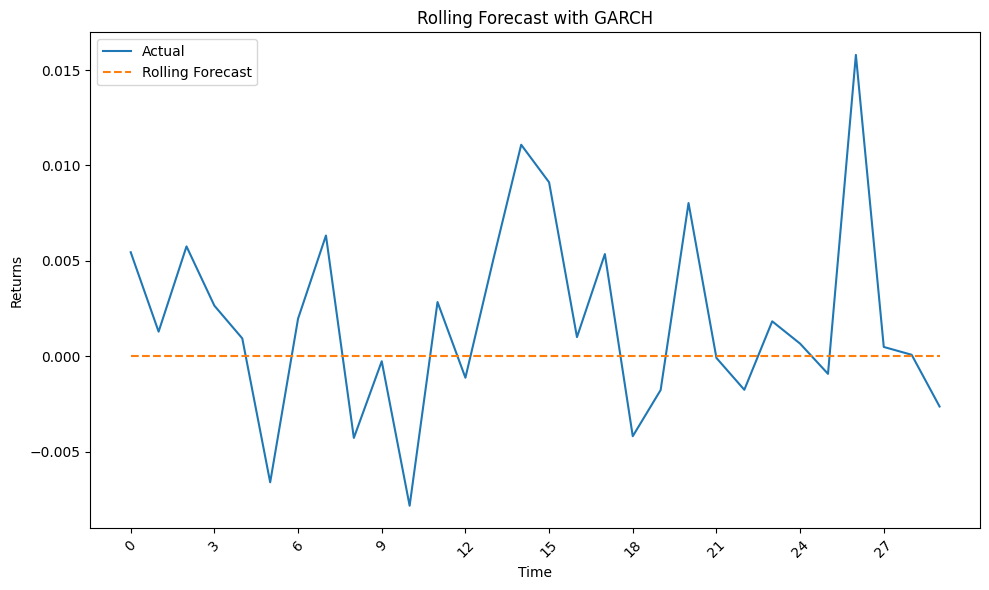

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming rolling_forecasts and data_test are defined

# Create a range of integers for the x-axis based on the length of data_test
x_values = np.arange(len(data_test))

# Plot rolling forecast
plt.figure(figsize=(10, 6))
plt.plot(x_values, data_test, label='Actual')
plt.plot(x_values, rolling_forecasts, label='Rolling Forecast', linestyle='--')
plt.title('Rolling Forecast with GARCH')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.xticks(x_values[::len(data_test) // 10], rotation=45)  # Adjust x-axis ticks for readability
plt.tight_layout()
plt.show()
